# SPECFEM Users Workshop -- Day 1 (Oct. 5, 2022)

## Part 1C: Intro to SPECFEM3D

SPECFEM3D follows very similar practices as SPECFEM2D, so what we have learned thus far will help us understand how to run simulations in SPECFEM3D.
In this notebook we will be using SPECFEM3D_Cartesian, which has been installed and compiled in our container. In this short intro the SPEFEM3D, we will point out key differences between the 2D and 3D codes, and run a small example problem with a 3D homogeneous halfspace model.

-----------

### Relevant Information

>__NOTE:__ These instructions should be run from inside the Docker container, using Jupyter Lab. The Docker container should have the adjTomo toolkit installed (SeisFlows, Pyatoa, PySEP), as well as SPECFEM2D and SPECEFM3D compiled with MPI. 

**Relevant Links:** 
- Day 1 Slides !!! ADD THIS !!!
- [Today's Notebook](https://github.com/adjtomo/adjdocs/blob/main/workshops/2022-10-05_specfem_users/day_1b_forward_simulations.ipynb)
- Completed Notebook !!! ADD THIS !!!

**Jupyter Quick Tips:**

- **Run cells** one-by-one by hitting the $\blacktriangleright$ button at the top, or by hitting `Shift + Enter`
- **Run all cells** by hitting the $\blacktriangleright\blacktriangleright$ button at the top, or by running `Run -> Run All Cells`
- **Currently running cells** that are still processing will have a `[*]` symbol next to them
- **Finished cells** will have a `[1]` symbol next to them. The number inside the brackets represents what order this cell has been run in.
- Commands that start with `!` are Bash commands (i.e., commands you would run from the terminal)
- Commands that start with `%` are Jupyter Magic commands.
- To time a task, put a `%time` before the command (e.g., `%time ! ls`)


## 1) Setting Up 

It is often desireable to run SPECFEM outside of the cloned repository, in order to keep files and outputs manageable. The trick here is that SPECFEM only requires 3 compenents for a sucessful simulation, the `bin/`, `DATA/`, and `OUTPUT_FILES/` directories. In this section we will set up a SPECFEM3D working directory that we can play around with.

>__NOTE:__ We will be doing all our work in the directory `/home/scoped/work_day_1/specfem3d_workdir`. All the following cells assume that we are in this directory, so you must evaluate the '%cd' command to ensure that cells work as expected.

In [1]:
! mkdir -p /home/scoped/work/day_1/specfem3d_workdir
%cd /home/scoped/work/day_1/specfem3d_workdir

/home/scoped/work/day_1/specfem3d_workdir


In [2]:
# Symlink the binary files, and copy the relevant DATA/ directory
! ln -s /home/scoped/specfem3d/bin .
! cp -r /home/scoped/specfem3d/EXAMPLES/homogeneous_halfspace/DATA .
! cp -r /home/scoped/specfem3d/EXAMPLES/homogeneous_halfspace/meshfem3D_files DATA/.
! mkdir -p OUTPUT_FILES/DATABASES_MPI

In [3]:
! ls

bin  DATA  OUTPUT_FILES


In [4]:
! ls DATA

CMTSOLUTION	 observation_grid_to_use_for_gravity.txt  STATIONS_ADJOINT
FORCESOLUTION	 Par_file
meshfem3D_files  STATIONS


## 2) Differences between SPECFEM2D and 3D

# !!! Bryant to do this !!!

## 3) SPECFEM3D Homogeneous Halfspace example

# !!! Aakash to do this !!!

If you can, try to follow along with how Day 1B notebook progresses, i.e., 
- explore the Par_file, point out key parameters for the example
- explore the CMTSOLUTION file
- explore the STATIONS file
- explore the meshfem3D_files directory and what it all means

To quickly change `Par_file` parameters, you can use SeisFlows `sempar`. Look at Day 1A and 1B for examples but the call is like:

`! seisflows sempar -P DATA/Par_file {key} {val:optional}`

for example, to change the `Par_file` parameter `NPROC` to 4 (it is case insensitive)  
`! seisflows sempar -P DATA/Par_file nproc 4 `

In [5]:
# Meshing
! mpiexec -np 4 ./bin/xmeshfem3D

In [6]:
# Database Generation
! mpiexec -np 4 ./bin/xgenerate_databases

In [7]:
# Simulation
! mpiexec -np 4 ./bin/xspecfem3D

In [8]:
! ls OUTPUT_FILES/*.semd

OUTPUT_FILES/DB.X20.BXX.semd  OUTPUT_FILES/DB.X40.BXX.semd
OUTPUT_FILES/DB.X20.BXY.semd  OUTPUT_FILES/DB.X40.BXY.semd
OUTPUT_FILES/DB.X20.BXZ.semd  OUTPUT_FILES/DB.X40.BXZ.semd
OUTPUT_FILES/DB.X30.BXX.semd  OUTPUT_FILES/DB.X50.BXX.semd
OUTPUT_FILES/DB.X30.BXY.semd  OUTPUT_FILES/DB.X50.BXY.semd
OUTPUT_FILES/DB.X30.BXZ.semd  OUTPUT_FILES/DB.X50.BXZ.semd


In [9]:
# The first 10 lines of a seismogram
! head -10 OUTPUT_FILES/DB.X50.BXZ.semd

  -10.0000000       0.00000000    
  -9.94999981       0.00000000    
  -9.89999962       0.00000000    
  -9.85000038       0.00000000    
  -9.80000019       0.00000000    
  -9.75000000       0.00000000    
  -9.69999981       0.00000000    
  -9.64999962       0.00000000    
  -9.60000038       0.00000000    
  -9.55000019      -6.22681108E-22


Text(0, 0.5, 'Displacement [m]')

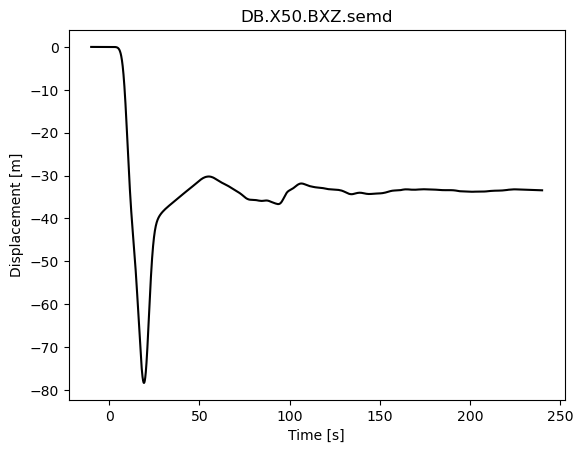

In [10]:
# We can easily plot these using NumPy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("OUTPUT_FILES/DB.X50.BXZ.semd", dtype=float)
plt.plot(data[:,0], data[:,1], c="k")
plt.title("DB.X50.BXZ.semd")
plt.xlabel("Time [s]")
plt.ylabel("Displacement [m]")

In [11]:
# SeisFlows also has a simple command line tool to plot seismograms using ObsPy
! seisflows plotst OUTPUT_FILES/DB.X50.BXZ.semd --savefig DB.X50.BXZ.semd.png

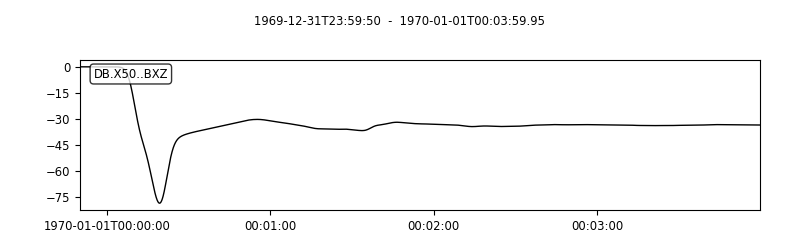

In [12]:
# We need to use IPython to visualize these figures in the notebook
from IPython.display import Image
Image("DB.X50.BXZ.semd.png")

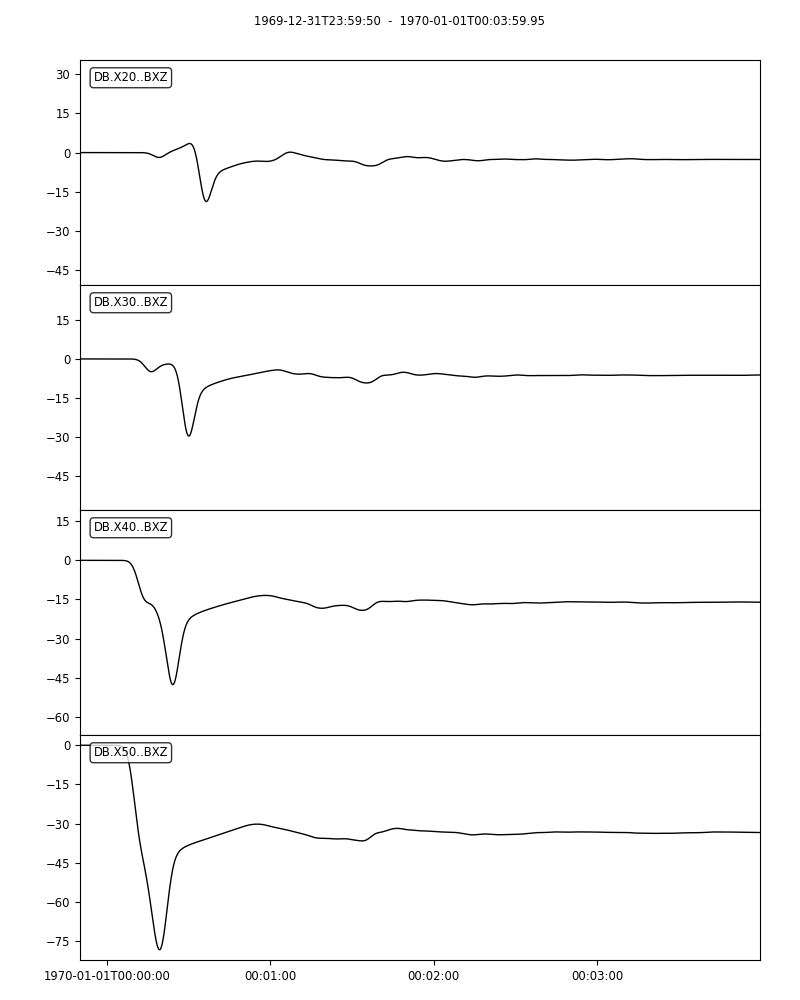

In [13]:
# We can use wildcards to plot multiple waveforms at once
! seisflows plotst OUTPUT_FILES/DB.X??.BXZ.semd --savefig DB.Xnn.BXZ.semd.png
Image("DB.Xnn.BXZ.semd.png")